<a href="https://colab.research.google.com/github/Magar-Rem123/ML_Projects_Regression/blob/main/ML_Project_Mark_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clone the github**

In [47]:
!git clone https://github.com/Magar-Rem123/ML_Projects_Regression.git
from IPython.display import clear_output
clear_output

Cloning into 'ML_Projects_Learn'...


<function IPython.core.display.clear_output(wait=False)>

#**Motivation Project**

##**End to End Till Deployment**

###**Student Mark Prediction**

#**1. Project Meeting**

#**2. Business Problem**

* How many hours need to do study to get 99% marks?

* How many hours need to do study to pass the exam?

* If student will do study X(4) hours per day so how much marks student will get?

##**Essential Libraries**

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**3. Data Collection and Load the data set**

path = r"path of data set"

df = pd.read_csv(path)


In [ ]:
# Data set load
path = r"/content/drive/MyDrive/Data_ML/student_info.csv"
df = pd.read_csv(path)

In [ ]:
# See the top five records of the data set
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
# See the bottom five records of the data set
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [ ]:
# See the shape of the data set
df.shape

(200, 2)

#**4. Discover and Data Visualization**

In [ ]:
# See the infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
# See the numerical infomation
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


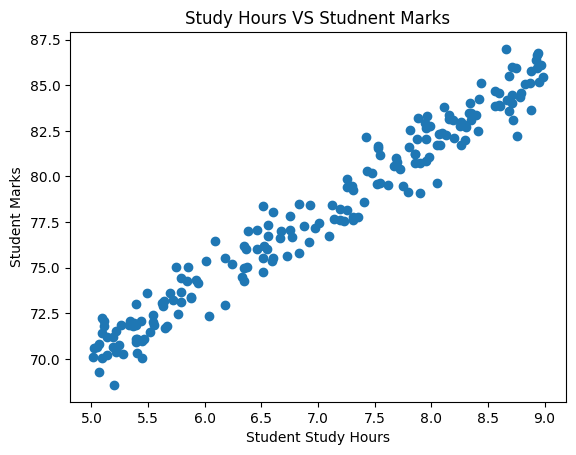

In [ ]:
# Data visualization
# Make a scatter plot
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel('Student Study Hours')
plt.ylabel('Student Marks')
plt.title('Study Hours VS Studnent Marks')
plt.show()

**This visualization shows that that there is linear format or linear fashion.**

#**5. Prepare the data for ML Algorithm**

##**Data Cleaning process**

In [ ]:
# See the missing values
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [ ]:
# See the total missing values
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

###**Data Imputaion**

In [ ]:
# Replace missing value by mean marks
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [ ]:
# Fill the mull value
df2 = df.fillna(df.mean())

In [ ]:
# save my clean data set for my future use
df2.to_csv('clean_data.csv',index=False)

In [ ]:
# Check the clean data frame
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
# for use
df2.head(2)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74


###**Input and Output Data set**

In [ ]:
# Input and output data
X = df2.drop('student_marks', axis = 'columns')
y = df2.drop('study_hours', axis = 'columns')

In [ ]:
# See the shape
print('Shape of X =',X.shape)
print('Shape of y=',y.shape)

Shape of X = (200, 1)
Shape of y= (200, 1)


###**Train Test Split**

In [ ]:
# IMport librareis
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 51)


In [ ]:
# See the shape
print('Shape of X_train=',X_train.shape)
print('Shape of X_train=',y_train.shape)
print('Shape of X_train=',X_test.shape)
print('Shape of X_train=',y_test.shape)

Shape of X_train= (160, 1)
Shape of X_train= (160, 1)
Shape of X_train= (40, 1)
Shape of X_train= (40, 1)


#**MOdel Selection**

y = mx + c

In [ ]:
# Import Algorithm or class
from sklearn.linear_model import LinearRegression

In [ ]:
# Make an object
lr = LinearRegression()

In [ ]:
# Fit or train our model
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Check the coefficient or slope
lr.coef_

array([[3.93571802]])

In [ ]:
# Check Intercept
lr.intercept_

array([50.44735504])

In [ ]:
# y = mx + c
m = 3.93
c = 50.44
y = m*4 + c
print(y)

66.16


In [ ]:
# Make a prediction
lr.predict([[4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[66.1902271]])

In [ ]:
# see the actual value
lr.predict([[4]])[0][0].round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19

In [ ]:
# Test our model
y_pred = lr.predict(X_test)
print(y_pred)

[[83.11381458]
 [78.9025963 ]
 [84.57003024]
 [85.82946001]
 [84.72745896]
 [80.75238377]
 [72.84159055]
 [71.66087515]
 [73.23516235]
 [71.66087515]
 [73.47130543]
 [76.38373677]
 [73.23516235]
 [73.58937697]
 [82.95638585]
 [70.40144538]
 [73.23516235]
 [78.74516758]
 [75.55723598]
 [82.68088559]
 [76.65923703]
 [70.48015974]
 [74.77009238]
 [77.98143645]
 [85.59331693]
 [82.56281405]
 [76.42309395]
 [85.0423164 ]
 [78.39095296]
 [81.38209865]
 [81.73631327]
 [83.15317176]
 [82.20859943]
 [81.10659839]
 [73.58937697]
 [71.1492318 ]
 [71.89701823]
 [81.53952737]
 [72.60544747]
 [71.93637541]]


In [ ]:
# Make a data frame for origina and predicted
df3 = pd.DataFrame(np.c_[X_test,y_test,y_pred],columns = ['Study_Hours','Student_Mark_Original','Student_Mark_predicted'])
# see the head
df3.head()

,Study_Hours,Student_Mark_Original,Student_Mark_predicted
0,8.30,82.02,83.113815
1,7.23,77.55,78.902596
2,8.67,84.19,84.570030
3,8.99,85.46,85.829460
4,8.71,84.03,84.727459


#**7. Fine Tune of the Model**

Check the accuracy score

In [ ]:
# See the accuracy score
lr.score(X_test,y_test)

0.9514124242154466

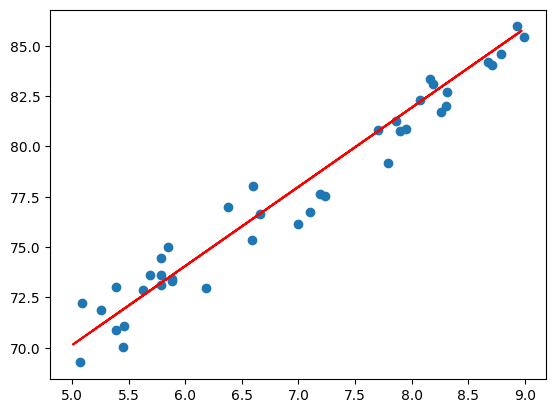

In [ ]:
# Prediction Visualization
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color = 'r')
plt.show()

#**8. Present our Model**

Show the accuracy score and discus about the deployment.


In [ ]:
#**10. Save our Model**

# Required Libraries
import joblib
joblib.dump(lr,'student_mark_predictor.pkl')

['student_mark_predictor.pkl']

In [ ]:
# Now see the perfromance
# load first
model = joblib.load('student_mark_predictor.pkl')
# see the result
model.predict([[5]])[0][0].round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.13

#**12. Finally Lunch, Monitor and Mainatin our system**

Make an Flask Application i.e wesite, android app, ios app

for web app use Flask, Django, or Streamlit

for mobile app use Kivy

#**Web App using Streamlit Framework**

##**Fist make python file in colab**

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
# Installation of streamlit in colab
#!pip install streamlit

In [ ]:
# Make a python file in colab
%%writefile app.py
import streamlit as st
#import time as t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
#################################################
# Load the model
model = joblib.load('student_mark_predictor.pkl')
# Load our data set
df = pd.read_csv('/content/clean_data.csv')

# Streamlit app
def main():
    st.title('Student Mark Predictor Web Application')
    st.image('/content/drive/MyDrive/web_page_images/stu_mark.png',width =250)
    st.write('Demo Web Application')
    # Display the dataset
    st.write(df.head(2))
    # User input for study hours
    study_hours = 0  # Initialize study_hours to a default value
    study_hours = st.number_input('Study Hours', min_value=0.0, max_value=24.0, value=1.0, step=0.5)

    # Predict button
    if st.button('Predict'):
        if study_hours <=0:
            st.write('Invalid input, Study hours cannot be negative and zero')
        elif study_hours >=24:
            st.write('Invalid input, Study hours can not be full  24 and more.')
        else:
            predicted_marks = model.predict([[study_hours]])
            st.write(f'The predicted student marks for {study_hours} hours of study is: {predicted_marks[0][0]:.2f}')

if __name__ == '__main__':
    main()


Overwriting app.py


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# To get the endpoont IP
!wget -q -O - ipv4.icanhazip.com

34.138.169.126


#**Alternative solution of ngrok**

Run streamlit using localtunnel
npm installation would take some time for the first time

#**Stremlit Run/ App running**

In [ ]:
# Code
!streamlit run app.py & npx localtunnel --port 8501

[##................] \ fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.138.169.126:8501

npx: installed 22 in 7.383s
your url is: https://few-states-learn.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
  Stopping...
^C


#**To get the end point**